In [1]:
import os

# Directory to search
search_dir = "results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average"

# List to store csv file paths
csv_files = []

# Walk through the directory and subdirectories
for root, dirs, files in os.walk(search_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

# Print the list of csv files
for csv_file in csv_files:
    print(csv_file)


results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average/all/Enformer_L2_L2.plus.all.csv
results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average/all/joint_regression_data_seed_42_lr_0.0005_wd_0.005_rcprob_0.5_rsmax_3-human_L2_L2.plus.all.csv
results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average/all/joint_regression_data_seed_42_lr_0.0005_wd_0.005_rcprob_0.5_rsmax_3-mouse_L2_L2.plus.all.csv
results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average/all/wandb_human_enformer_latest.ckpt_L2_L2.plus.all.csv
results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average/all/joint_regression_data_seed_42_lr_0.0005_wd_0.005_rcprob_0.5_rsmax_3-diff_L2_L2.plus.all.csv
results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average/all/joint_regression_data_seed_42_lr_0.0005_wd_0.005_rcprob_0.5_rsmax_3-diff_L2_L2.minus.all.csv
results/dataset/complex_traits_matched_9/AUPRC_by_chrom_weighted_average/all/joint_regr

In [2]:
import pandas as pd
pd.read_csv(csv_file).iloc[0]["score"]

np.float64(0.2455475847317763)

In [3]:
from collections import OrderedDict

replaces = OrderedDict({
'.all.csv':"",
'Enformer_L2_L2.plus.all.csv':"origEnformer",
"Enformer":"origEnformer",
 'joint_regression_data_seed_42_lr_0.0005_wd_0.005_rcprob_0.5_rsmax_3':"persEnformer",
 'joint_regression_data_seed_42_lr_0.0005_wd_0.005_rcprob_0.5_rsmax_3-mouse_L2_L2.plus.all.csv':"origEnformer",
 'wandb_human_enformer_latest.ckpt':"origEnformer",
 "_L2_L2":"",
})


In [4]:
results = {}
for csv_file in csv_files:
    name = os.path.basename(csv_file)
    for r in replaces:
        name = name.replace(r,replaces[r])
    results[name] = pd.read_csv(csv_file).iloc[0]["score"]
results

{'origEnformer.plus': np.float64(0.2450375656564388),
 'persEnformer-human.plus': np.float64(0.1945624015543733),
 'persEnformer-mouse.plus': np.float64(0.1917459258163162),
 'persEnformer-diff.plus': np.float64(0.1371360065064685),
 'persEnformer-diff.minus': np.float64(0.1279122478647277),
 'persEnformer-diffabs.plus': np.float64(0.1573880882200941),
 'origEnformer.LogisticRegression.chrom.csv': np.float64(0.3035783036015097),
 'OrigorigEnformer_and_Diff.LogisticRegression.chrom.csv': np.float64(0.3037005319507059),
 'origEnformer-5.plus': np.float64(0.2455475847317763)}

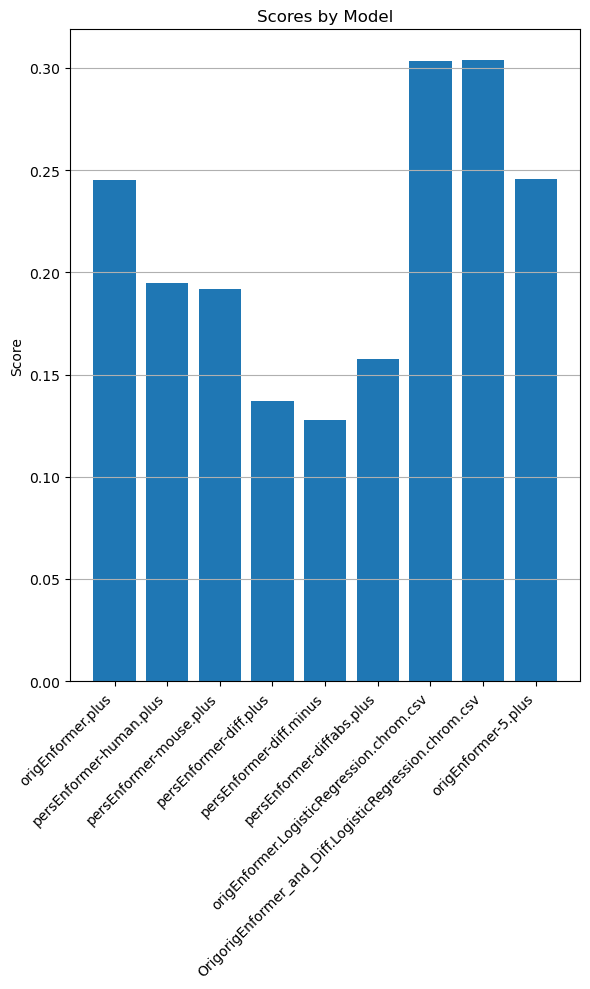

In [6]:
import matplotlib.pyplot as plt

# Plot bar showing value of each item in results
plt.figure(figsize=(6, 10))
plt.bar(results.keys(), results.values())
plt.ylabel("Score")
plt.title("Scores by Model")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()